<a href="https://colab.research.google.com/github/Nithilan98/DataScience_Task_7/blob/main/KNN_Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.spatial import distance

In [55]:
train = pd.read_csv("trainKNN.txt", header=None)
train.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
train = train.drop('ID', axis=1) # Drop ID since irrelevant to predictions
test = pd.read_csv('testKNN.txt', header=None)
test.columns=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
test = test.drop('ID', axis=1)

In [56]:
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [57]:
test.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [58]:
train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [59]:
def standardize (df):
    for col in df.columns:
        if col != "Type of glass": # Don't standardize the categories
            df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

In [78]:
# Standardize data
train = standardize(train)
test = standardize(test)
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,0.888537,0.338119,1.242977,-0.720654,-1.120263,-0.682898,-0.113060,-0.33849,-0.581932,1
1,-0.224221,0.657345,0.603903,-0.191863,0.123880,-0.058551,-0.760269,-0.33849,-0.581932,1
2,-0.692234,0.197659,0.568000,0.174223,0.464382,-0.192340,-0.795443,-0.33849,-0.581932,1
3,-0.207857,-0.210950,0.668529,-0.334230,-0.033275,0.075237,-0.485909,-0.33849,-0.581932,1
4,-0.286405,-0.134335,0.618265,-0.435920,0.582248,0.045506,-0.591432,-0.33849,-0.581932,1


In [77]:
df = train.copy()

## Exploratory data analysis

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

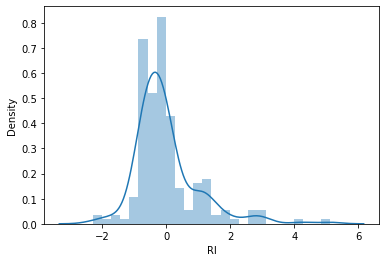

In [80]:
sns.distplot(df['RI'])
plt.show()

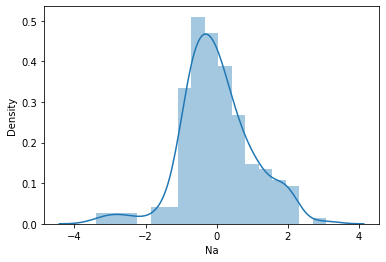

In [81]:
sns.distplot(df['Na'])
plt.show()

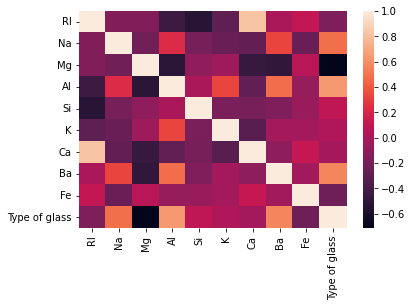

In [67]:
cor = train.corr()
sns.heatmap(cor)

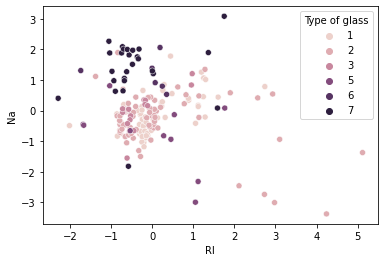

In [68]:
#Scatter plot of two features
sns.scatterplot(df['RI'],df['Na'],hue=df['Type of glass'])

## KNN Euclidean Distance

In [82]:
# k = 8 neighbors
euclid_model = KNeighborsClassifier(n_neighbors=10, metric=distance.sqeuclidean) # Square Euclidean distance model
manhattan_model = KNeighborsClassifier(n_neighbors=10, metric=distance.cityblock) # Manhattan distance model
x_train = train.drop(["Type of glass",'Ca','K'], axis=1)
y_train = train["Type of glass"]
euclid_model.fit(x_train,y_train) # Train models
manhattan_model.fit(x_train, y_train)
x_test = test.drop(["Type of glass",'Ca','K'], axis=1) 
y_test = test["Type of glass"]

In [83]:
# Make predictions
manhattan_predictions = manhattan_model.predict(x_test)
euclid_predictions = euclid_model.predict(x_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,1,1
1,1,1,1
2,1,1,1
3,2,2,2
4,2,2,1


In [84]:
# Evaluate performance
import warnings
warnings.filterwarnings('ignore')
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, manhattan_predictions, target_names=df['actual'].astype(str).unique()))
print ('\n')
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, euclid_predictions, target_names=df['actual'].astype(str).unique()))

Manhattan Accuracy: 61.11%
              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.50      1.00      0.67         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.61        18
   macro avg       0.49      0.61      0.51        18
weighted avg       0.49      0.61      0.51        18



Square Euclidean Accuracy: 44.44%
              precision    recall  f1-score   support

           1       0.38      1.00      0.55         3
           2       0.20      0.33      0.25         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         3
           7       0.75      1.00      0.86         3

    accuracy  